In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9e9bf04d456f4220a69a9d901affbbce = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Wd3JW5kfHxgPGRHyyxMm0UReTl9TKtV7_-SMQPDcXhYb',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_9e9bf04d456f4220a69a9d901affbbce.get_object(Bucket='wind-donotdelete-pr-pvqnmpqkmboasv',Key='T1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [3]:
# df = pd.read_csv("T1.csv")

In [4]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [5]:
df.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [6]:
df.shape

(50530, 5)

In [7]:
df["Date/Time"].dtype

dtype('O')

In [8]:
df["Date/Time"]= pd.to_datetime(df["Date/Time"])

In [9]:
df["Date/Time"].dtype

dtype('<M8[ns]')

In [10]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date/Time                      50530 non-null  datetime64[ns]
 1   LV ActivePower (kW)            50530 non-null  float64       
 2   Wind Speed (m/s)               50530 non-null  float64       
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64       
 4   Wind Direction (°)             50530 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.9 MB


In [12]:
import seaborn as sns

<AxesSubplot:>

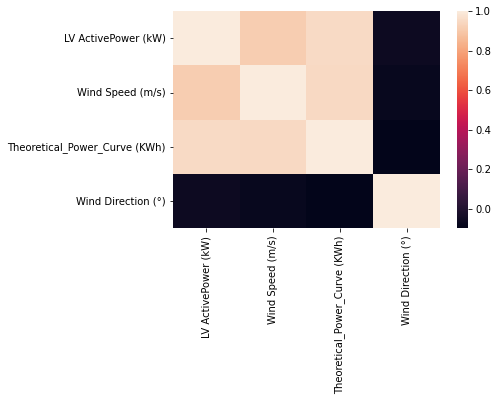

In [13]:
sns.heatmap(df.corr())

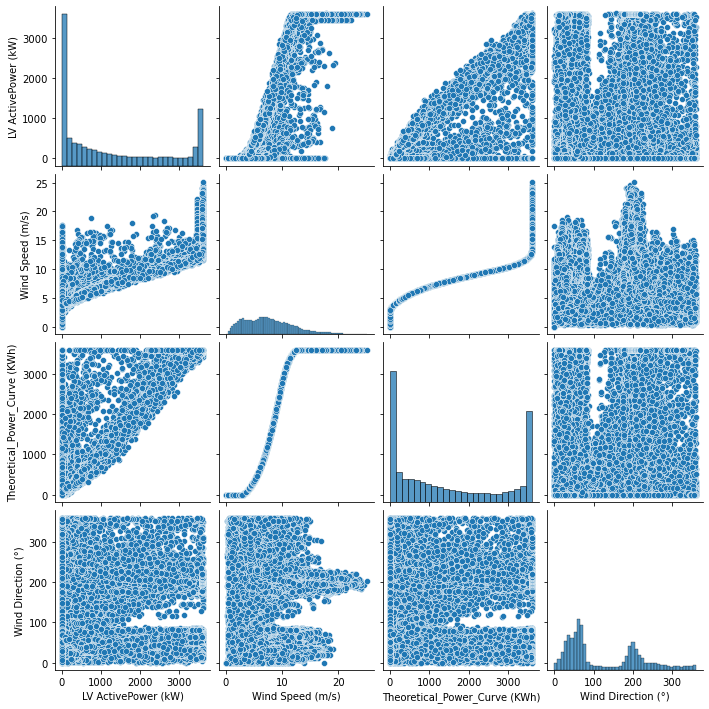

In [14]:
sns.pairplot(df)

In [15]:
x = df.iloc[:, 2:5].values
y = df.iloc[:,1].values

In [16]:
x.shape

(50530, 3)

In [17]:
y.shape

(50530,)

Text(0, 0.5, 'LV ActivePower (kW)')

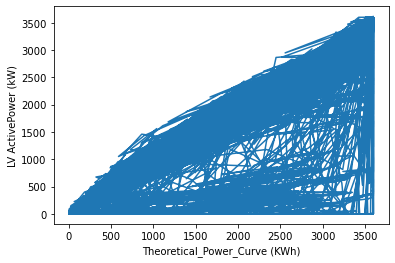

In [18]:
plt.plot(x[:,1],y)
plt.xlabel("Theoretical_Power_Curve (KWh)")
plt.ylabel("LV ActivePower (kW)")

Text(0, 0.5, 'LV ActivePower (kW)')

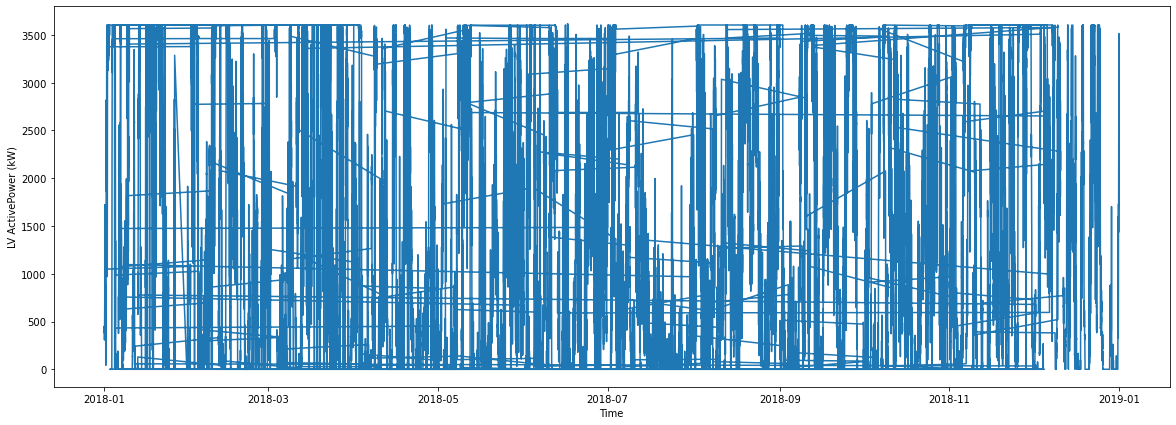

In [19]:
plt.figure(figsize = (20,7))
plt.plot(df['Date/Time'], y)
plt.xlabel("Time")
plt.ylabel("LV ActivePower (kW)")

In [20]:
df.corr()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
LV ActivePower (kW),1.000000,0.912774,0.949918,-0.062702
Wind Speed (m/s),0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000,-0.099076
Wind Direction (°),-0.062702,-0.077188,-0.099076,1.000000


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scale1 = MinMaxScaler()
scale2 = MinMaxScaler()
xscaled = scale1.fit_transform(x)
y = y.reshape(-1,1)
yscaled = scale2.fit_transform(y)

In [23]:
xscaled

array([[0.21071704, 0.11564692, 0.7222129 ],
       [0.22503231, 0.14442153, 0.74623031],
       [0.20693623, 0.10858334, 0.75712948],
       ...,
       [0.33465661, 0.49674577, 0.23539741],
       [0.37377457, 0.67177292, 0.23416244],
       [0.3959108 , 0.77199558, 0.22854214]])

In [24]:
y

array([[ 380.04779053],
       [ 453.76919556],
       [ 306.37658691],
       ...,
       [2201.10693359],
       [2515.6940918 ],
       [2820.46606445]])

In [25]:
yscaled

array([[0.10563314],
       [0.1259914 ],
       [0.08528875],
       ...,
       [0.60852085],
       [0.69539448],
       [0.77955763]])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_trainscaled, X_testscaled, y_trainscaled, y_testscaled = train_test_split(xscaled, yscaled, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
forest_model = RandomForestRegressor(max_leaf_nodes =500, random_state=1)

In [30]:
forest_model.fit(X_train, y_train)

/tmp/wsuser/ipykernel_220/2068033108.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


RandomForestRegressor(max_leaf_nodes=500, random_state=1)

In [31]:
power_preds = forest_model.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error,r2_score
print(mean_absolute_error(y_test, power_preds))

160.5520251233


In [33]:
print(r2_score(y_test,power_preds))

0.9065833929858784


In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = regressor.predict(X_test)

In [36]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test, y_pred))

0.9006599245385882
188.7522122714776


In [37]:
regressor1 = LinearRegression()
regressor1.fit(X_trainscaled, y_trainscaled)

LinearRegression()

In [38]:
y_pred1 = regressor1.predict(X_testscaled)

In [39]:
print(r2_score(y_testscaled,y_pred1))

0.9006599245385882


In [40]:
import joblib

In [41]:
joblib.dump(regressor, 'Wind_LR')

['Wind_LR']

In [42]:
joblib.dump(forest_model, 'Wind_RFR')

['Wind_RFR']

In [43]:
pwd


'/home/wsuser/work'

In [45]:
!pip install -U ibm-watson-machine-learning

     |████████████████████████████████| 1.7 MB 25.8 MB/s eta 0:00:01
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.208
    Uninstalling ibm-watson-machine-learning-1.0.208:
      Successfully uninstalled ibm-watson-machine-learning-1.0.208


In [47]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [53]:
wml_credentials = {
    "apikey":"z5w_7QoNuv-PziHyHPjrv_fKcKhYzVDd_vhj4IWS2dli",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [54]:
wml_client=APIClient(wml_credentials)

In [55]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----------  ------------------------
ID                                    NAME        CREATED
f523e894-7aec-43e5-878d-6b47ec53f37d  WindEnergy  2022-05-31T11:49:40.649Z
------------------------------------  ----------  ------------------------


In [56]:
SPACE_ID = "f523e894-7aec-43e5-878d-6b47ec53f37d"

In [57]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [58]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [59]:
MODEL_NAME="WindEnergy"
DEPLOYMENT_NAME="WindDeploy"
DEMO_MODEL=forest_model

In [60]:
software_spec_uid=wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [61]:
model_props={
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
}

In [62]:
model_details=wml_client.repository.store_model(
   model=DEMO_MODEL,
    meta_props=model_props,
    training_data=X_train,
    training_target=y_train
)

In [63]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l0',
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
     'endpoint_url': 'not_applicable',
     'secret_access_key': 'not_applicable'},
    'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'}],
     'id': '1',
     'type': 'ndarray'},
    'type': 's3'}],
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-05-31T12:07:15.264Z',
  'id': 'c528de2d-a377-4833-a908-d867d0542143',
  'modified_at': '2022-05-31T12:07:20.339Z',
  'name': 'WindEnergy',
  'owner': 'IBMid-662003HC6Y',
  'resource_key': 'b2067899-2e23-40dd-949d-ad4d4422a63a',
  'space_id': 'f523e894-7aec-43e5-878d-6b47ec53f37d'},
 'system': {'warnings': []}}

In [64]:
model_id=wml_client.repository.get_model_id(model_details)

In [65]:
print(model_id)

c528de2d-a377-4833-a908-d867d0542143


In [66]:
deployment_props={
    wml_client.deployments.ConfigurationMetaNames:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [67]:
deployment=wml_client.deployments.create(
  artifact_uid= model_id,
  meta_props=deployment_props  
)



#######################################################################################

Synchronous deployment creation for uid: 'c528de2d-a377-4833-a908-d867d0542143' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='689614b2-8ded-4e79-aaac-49675c769d5b'
------------------------------------------------------------------------------------------------


